In [1]:
import pandas as pd
from useful_functions import bag_of_words_similarity,get_clusters,ratcliff_similarity
from sympy.plotting import plot
from igraph import *

In [2]:
pd.options.display.max_columns = 999

In [3]:
data_12 = pd.read_table('/Users/axa/Downloads/Medicare_Provider_Util_Payment_PUF_CY2012_update/Medicare_Provider_Util_Payment_PUF_CY2012.txt'\
                      )[1:]

/Users/axa/.pyenv/versions/2.7.12/envs/DS/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data_13 = pd.read_table('/Users/axa/Downloads/Medicare_Provider_Util_Payment_PUF_CY2013/Medicare_Provider_Util_Payment_PUF_CY2013.txt'\
                      )[1:]

In [ ]:
data_14 = pd.read_table('/Users/axa/Downloads/Medicare_Provider_Util_Payment_PUF_CY2014/Medicare_Provider_Util_Payment_PUF_CY2014.txt'\
                      )[1:]

In [4]:
data_12.sample(2)

,NPI,NPPES_PROVIDER_LAST_ORG_NAME,NPPES_PROVIDER_FIRST_NAME,NPPES_PROVIDER_MI,NPPES_CREDENTIALS,NPPES_PROVIDER_GENDER,NPPES_ENTITY_CODE,NPPES_PROVIDER_STREET1,NPPES_PROVIDER_STREET2,NPPES_PROVIDER_CITY,NPPES_PROVIDER_ZIP,NPPES_PROVIDER_STATE,NPPES_PROVIDER_COUNTRY,PROVIDER_TYPE,MEDICARE_PARTICIPATION_INDICATOR,PLACE_OF_SERVICE,HCPCS_CODE,HCPCS_DESCRIPTION,HCPCS_DRUG_INDICATOR,LINE_SRVC_CNT,BENE_UNIQUE_CNT,BENE_DAY_SRVC_CNT,AVERAGE_MEDICARE_ALLOWED_AMT,STDEV_MEDICARE_ALLOWED_AMT,AVERAGE_SUBMITTED_CHRG_AMT,STDEV_SUBMITTED_CHRG_AMT,AVERAGE_MEDICARE_PAYMENT_AMT,STDEV_MEDICARE_PAYMENT_AMT
8066242,1881624773,BOURLAND,WALTER,L,MD,M,I,8160 WALNUT HILL LN,SUITE 113,DALLAS,752314339,TX,US,General Surgery,Y,O,99214,Established patient office or other outpatient...,N,393.0,358.0,393.0,104.89,0.0,230.0,0.0,71.449211,28.395603
6839066,1740341593,BEARDEN,FRANK,L,MD,M,I,2011 EAST 75TH ST,SUITE 102,CHICAGO,60649,IL,US,Internal Medicine,Y,O,82962,Blood glucose (sugar) test performed by hand-h...,N,22.0,15.0,22.0,3.32,0.0,62.0,0.0,3.320000,0.000000


In [5]:
scope = data_12[['NPI','PROVIDER_TYPE','HCPCS_DESCRIPTION' ,'HCPCS_CODE','HCPCS_DESCRIPTION']]

In [6]:
provider_column = 'NPI'
code_column= 'HCPCS_CODE'

In [7]:
set(scope.PROVIDER_TYPE)

{'Addiction Medicine',
 'All Other Suppliers',
 'Allergy/Immunology',
 'Ambulance Service Supplier',
 'Ambulatory Surgical Center',
 'Anesthesiologist Assistants',
 'Anesthesiology',
 'Audiologist (billing independently)',
 'CRNA',
 'Cardiac Electrophysiology',
 'Cardiac Surgery',
 'Cardiology',
 'Certified Clinical Nurse Specialist',
 'Certified Nurse Midwife',
 'Chiropractic',
 'Clinical Laboratory',
 'Clinical Psychologist',
 'Colorectal Surgery (formerly proctology)',
 'Critical Care (Intensivists)',
 'Dermatology',
 'Diagnostic Radiology',
 'Emergency Medicine',
 'Endocrinology',
 'Family Practice',
 'Gastroenterology',
 'General Practice',
 'General Surgery',
 'Geriatric Medicine',
 'Geriatric Psychiatry',
 'Gynecological/Oncology',
 'Hand Surgery',
 'Hematology',
 'Hematology/Oncology',
 'Hospice and Palliative Care',
 'Independent Diagnostic Testing Facility',
 'Infectious Disease',
 'Internal Medicine',
 'Interventional Pain Management',
 'Interventional Radiology',
 'Licensed

In [8]:
data = scope[scope.PROVIDER_TYPE == 'Ophthalmology']

In [10]:
data.head()

,NPI,PROVIDER_TYPE,HCPCS_DESCRIPTION,HCPCS_CODE,HCPCS_DESCRIPTION
977,1003007816,Ophthalmology,Removal of cataract with insertion of lens,66984,Removal of cataract with insertion of lens
978,1003007816,Ophthalmology,Ultrasound of corneal structure and measurement,76514,Ultrasound of corneal structure and measurement
979,1003007816,Ophthalmology,Eye and medical examination for diagnosis and ...,92004,Eye and medical examination for diagnosis and ...
980,1003007816,Ophthalmology,Eye and medical examination for diagnosis and ...,92012,Eye and medical examination for diagnosis and ...
981,1003007816,Ophthalmology,Eye and medical examination for diagnosis and ...,92014,Eye and medical examination for diagnosis and ...


In [9]:
print 'number of ophtalmo : {}'.format(len(set(data.NPI)))
print 'number of codes : {}'.format(len(set(data.HCPCS_CODE)))

number of ophtalmo : 17071
number of codes : 719


In [11]:
traitement = []
medecin = []
for provider, inter_df in data.groupby(provider_column):
    dff = pd.DataFrame(inter_df.reset_index()).copy()
    s = ""
    if len(list(dff[code_column]))>4:
        for x in list(dff[code_column]):
            s+=' '+str(x)
        traitement.append(s)
        medecin.append(provider)
    else :
        pass

In [16]:
traitement[3]

' 66821 66984 67820 76519 92004 92012 92014 92083 92225'

## Bag of words

In [18]:
# In UK: there is 2700 oph , let's condider that 2000 are working with AXA
n_oph = 2000
similarity_matrix = bag_of_words_similarity(traitement[:n_oph])

In [12]:
#dic_of_clusters = get_clusters(similarity_matrix,traitement[:100],medecin[:100],0)

In [22]:
import pandas as pd
import random
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction import DictVectorizer
import igraph as ig
import difflib
from operator import itemgetter


def get_clusters__(similarity_matrix,threshold):


    # Delete low similarities
    low_values_indices = similarity_matrix < threshold
    similarity_matrix[low_values_indices] = 0

    h = ig.Graph.Weighted_Adjacency((similarity_matrix > 0).tolist(), mode='undirected', attr='weight', loops=False)
    h.es['weight'] = similarity_matrix[similarity_matrix.nonzero()]
    h.vs['label'] = range(len(similarity_matrix))

    # Clustering (get the dendogram and select the clustering that maximize the modularity)
    dendogram = h.community_fastgreedy(weights=h.es["weight"]) 
    clustering = dendogram.as_clustering()
    return clustering

In [23]:
clustering= get_clusters__(similarity_matrix,0)

In [270]:
for clu in list(clustering):
    print (len(clu) ,'clusters')

958 clusters
1021 clusters
21 clusters


In [98]:
label_cust = np.ones(n_oph)

In [99]:
label_cust[clustering[1]]=2

In [100]:
label_cust[clustering[2]]=3

In [101]:
from sklearn.metrics import silhouette_score

In [263]:
# GET SILHOUETTE SCORE 
silhouette_score(similarity_matrix ,label_cust,metric="precomputed")

-0.026766943894531211

In [110]:
#cluster_2 = list(medecin[i] for i in clustering[2] )
#test = list(traitement[i] for i in clustering[2])
#list(medecin[i] for i in clustering[2] )

## Racliff

In [274]:
similarity_racliff = ratcliff_similarity(traitement[:n_oph])
clustering_rac= get_clusters__(similarity_racliff,0)
for clu in list(clustering_rac):
    print (len(clu) ,'clusters')

925 clusters
1075 clusters


In [275]:
label_cust_rac = np.ones(n_oph)
label_cust_rac[clustering[1]]=2
label_cust_rac[clustering[2]]=3

In [276]:
silhouette_score(similarity_racliff ,label_cust_rac,metric="precomputed")

-0.0050205453927767846

# Formatting pandas dataframe

In [117]:
from requests import ConnectionError
import pymongo
from pymongo import MongoClient
import optparse

In [118]:
def create_mongo_db(drop_indicateur,data,provider_column,code_columns):
    
    client = MongoClient()
    db = client.experiement_ccsd
    
    if drop_indicateur:
        # drop the db
        db.enrichments_collection.drop()
    else:
        pass
    collection = db.enrichments_collection
    
    # if the db is not dropped and is not null , exist
    if db.enrichments_collection.count() >0:
        collection = db.enrichments_collection
        
    else:
        for provider, inter_df in data.groupby(provider_column):
            dff = pd.DataFrame(inter_df.reset_index()).copy()
            for code , inter_df_2 in dff.groupby(code_columns):
                temporary = pd.DataFrame(inter_df_2.reset_index()).copy()

                number_treatment = {'provider_id':provider,code:len(temporary)}
                collection.insert_one(number_treatment)
                
    return pd.DataFrame(list(collection.find()))

In [119]:
# You need to open the mongo connection before executing the code
#grouping_traitment = create_mongo_db(False,data,provider_column,code_column)

In [120]:
client = MongoClient()
db = client.experiement_ccsd
collection = db.enrichments_collection
grouping_traitment = pd.DataFrame(list(collection.find()))

In [121]:
grouping_traitment.head()

,00103,00140,00142,0191T,0192T,0198T,10040,10060,10061,10140,10160,11042,11045,11100,11101,11200,11310,11311,11313,11401,11402,11403,11421,11422,11423,11440,11441,11442,11443,11444,11446,11602,11603,11640,11641,11642,11643,11900,11901,12001,12011,12020,12032,12051,12052,13101,13120,13121,13131,13132,13151,13152,13160,14000,14001,14020,14040,14041,14060,14061,14301,14302,15002,15004,15120,15135,15240,15260,15275,15576,15731,15732,15740,15770,15822,15823,15845,17000,17003,17004,17108,17110,17250,17261,17262,17280,20550,20551,20600,20605,20610,20926,21015,21280,21282,21930,22633,22842,22851,25310,25447,26055,28285,29075,29405,29848,29881,30130,30140,30300,30903,30930,30999,31200,31201,31205,31231,31237,31238,31239,31240,31254,31505,31575,31579,31600,36415,36471,36475,37609,40818,43200,47562,62311,63047,64405,64483,64612,64613,64640,65093,65103,65105,65175,65205,65210,65220,65222,65265,65286,65400,65420,65426,65430,65435,65436,65450,65600,65710,65730,65750,65755,65756,65757,65772,65778,65779,65780,65782,65800,65805,65810,65815,65850,65855,65860,65865,65870,65875,66020,66030,66130,66150,66160,66170,66172,66174,66175,66180,66185,66225,66250,66500,66625,66680,66682,66700,66710,66711,66720,66740,66761,66762,66770,66820,66821,66825,66830,66850,66852,66940,66982,66983,66984,66985,66986,66990,66999,67005,67010,67015,67025,67027,67028,67030,67031,67036,67039,67040,67041,67042,67043,67101,67105,67107,67108,67110,67112,67113,67121,67141,67145,67208,67210,67218,67220,67221,67225,67227,67228,67250,67255,67299,67311,67312,67314,67316,67320,67331,67332,67334,67335,67340,67343,67345,67400,67412,67415,67420,67450,67500,67515,67550,67700,67710,67715,67800,67801,67805,67808,67810,67820,67825,67830,67835,67840,67850,67875,67880,67882,67900,67901,67903,67904,67908,67911,67912,67914,67915,67916,67917,67921,67923,67924,67930,67935,67938,67950,67961,67966,67971,67973,67974,67975,67999,68020,68040,68100,68110,68115,68130,68135,68200,68320,68325,68326,68330,68335,68340,68362,68399,68400,68440,68505,68520,68525,68530,68700,68705,68720,68745,68750,68760,68761,68801,68810,68811,68815,68816,68840,69210,69420,69433,69436,70486,70553,71010,71020,72020,72040,72050,72070,72072,72080,72100,72141,72148,72158,72170,72195,73030,73060,73080,73100,73110,73120,73130,73140,73221,73500,73510,73520,73550,73560,73562,73564,73590,73600,73610,73620,73630,73650,73700,73721,74000,74020,76000,76510,76511,76512,76513,76514,76516,76519,76529,76536,76882,76942,76950,77002,77003,77080,77263,78660,80048,80051,80053,80061,81001,81002,81003,82044,82270,82435,82565,82947,82962,83036,83037,83861,84132,84443,84450,84460,84520,85014,85018,85025,85027,85610,85651,85652,85730,86140,86318,86580,87070,87077,87147,87184,87205,87809,88106,88108,88173,88300,88302,88304,88305,88307,88312,88313,88321,88331,88332,88342,90656,90662,90732,90806,92002,92004,92012,92014,92015,92018,92020,92025,92060,92065,92071,92072,92081,92082,92083,92100,92132,92133,92134,92136,92140,92225,92226,92227,92228,92230,92235,92240,92250,92260,92265,92270,92275,92283,92284,92285,92286,92287,92311,92312,92313,92325,92326,92499,92504,92511,92540,92541,92542,92543,92546,92547,92548,92550,92553,92557,92563,92567,92568,92570,92587,92588,92620,93000,93005,93010,93880,93886,93888,93922,93923,93970,94010,94060,94640,94664,94681,95004,95024,95027,95060,95065,95115,95117,95165,95810,95811,95813,95816,95819,95822,95831,95860,95861,95874,95900,95903,95904,95926,95930,95934,95992,96116,96365,96367,96372,96374,96375,96405,96406,96413,96415,96521,96567,97001,97003,97032,97035,97110,97124,97140,97535,97597,97605,97762,99144,99145,99183,99201,99202,99203,99204,99205,99211,99212,99213,99214,99215,99221,99222,99223,99231,99232,99233,99234,99238,99282,99283,99284,99285,99291,99304,99305,99306,99307,99308,99309,99310,99318,99325,99326,99327,99328,99334,99335,99336,99337,99343,99344,99345,99347,99348,99349,99350,99354,99355,99356,99406,99407,A9579,G0008,G0009,G0101,G0108,G0117,G0179,G0180,G0181,G0186,G0268,G0436,G0438,G0439,J0171,J0558,J0585,J05

In [122]:
grouping_traitment.drop('_id', axis=1, inplace=True)
grouping_traitment.fillna(0,inplace=True)

In [147]:
formated_data = grouping_traitment.groupby('provider_id').sum().reset_index()

In [148]:
formated_data.head()

,provider_id,00103,00140,00142,0191T,0192T,0198T,10040,10060,10061,10140,10160,11042,11045,11100,11101,11200,11310,11311,11313,11401,11402,11403,11421,11422,11423,11440,11441,11442,11443,11444,11446,11602,11603,11640,11641,11642,11643,11900,11901,12001,12011,12020,12032,12051,12052,13101,13120,13121,13131,13132,13151,13152,13160,14000,14001,14020,14040,14041,14060,14061,14301,14302,15002,15004,15120,15135,15240,15260,15275,15576,15731,15732,15740,15770,15822,15823,15845,17000,17003,17004,17108,17110,17250,17261,17262,17280,20550,20551,20600,20605,20610,20926,21015,21280,21282,21930,22633,22842,22851,25310,25447,26055,28285,29075,29405,29848,29881,30130,30140,30300,30903,30930,30999,31200,31201,31205,31231,31237,31238,31239,31240,31254,31505,31575,31579,31600,36415,36471,36475,37609,40818,43200,47562,62311,63047,64405,64483,64612,64613,64640,65093,65103,65105,65175,65205,65210,65220,65222,65265,65286,65400,65420,65426,65430,65435,65436,65450,65600,65710,65730,65750,65755,65756,65757,65772,65778,65779,65780,65782,65800,65805,65810,65815,65850,65855,65860,65865,65870,65875,66020,66030,66130,66150,66160,66170,66172,66174,66175,66180,66185,66225,66250,66500,66625,66680,66682,66700,66710,66711,66720,66740,66761,66762,66770,66820,66821,66825,66830,66850,66852,66940,66982,66983,66984,66985,66986,66990,66999,67005,67010,67015,67025,67027,67028,67030,67031,67036,67039,67040,67041,67042,67043,67101,67105,67107,67108,67110,67112,67113,67121,67141,67145,67208,67210,67218,67220,67221,67225,67227,67228,67250,67255,67299,67311,67312,67314,67316,67320,67331,67332,67334,67335,67340,67343,67345,67400,67412,67415,67420,67450,67500,67515,67550,67700,67710,67715,67800,67801,67805,67808,67810,67820,67825,67830,67835,67840,67850,67875,67880,67882,67900,67901,67903,67904,67908,67911,67912,67914,67915,67916,67917,67921,67923,67924,67930,67935,67938,67950,67961,67966,67971,67973,67974,67975,67999,68020,68040,68100,68110,68115,68130,68135,68200,68320,68325,68326,68330,68335,68340,68362,68399,68400,68440,68505,68520,68525,68530,68700,68705,68720,68745,68750,68760,68761,68801,68810,68811,68815,68816,68840,69210,69420,69433,69436,70486,70553,71010,71020,72020,72040,72050,72070,72072,72080,72100,72141,72148,72158,72170,72195,73030,73060,73080,73100,73110,73120,73130,73140,73221,73500,73510,73520,73550,73560,73562,73564,73590,73600,73610,73620,73630,73650,73700,73721,74000,74020,76000,76510,76511,76512,76513,76514,76516,76519,76529,76536,76882,76942,76950,77002,77003,77080,77263,78660,80048,80051,80053,80061,81001,81002,81003,82044,82270,82435,82565,82947,82962,83036,83037,83861,84132,84443,84450,84460,84520,85014,85018,85025,85027,85610,85651,85652,85730,86140,86318,86580,87070,87077,87147,87184,87205,87809,88106,88108,88173,88300,88302,88304,88305,88307,88312,88313,88321,88331,88332,88342,90656,90662,90732,90806,92002,92004,92012,92014,92015,92018,92020,92025,92060,92065,92071,92072,92081,92082,92083,92100,92132,92133,92134,92136,92140,92225,92226,92227,92228,92230,92235,92240,92250,92260,92265,92270,92275,92283,92284,92285,92286,92287,92311,92312,92313,92325,92326,92499,92504,92511,92540,92541,92542,92543,92546,92547,92548,92550,92553,92557,92563,92567,92568,92570,92587,92588,92620,93000,93005,93010,93880,93886,93888,93922,93923,93970,94010,94060,94640,94664,94681,95004,95024,95027,95060,95065,95115,95117,95165,95810,95811,95813,95816,95819,95822,95831,95860,95861,95874,95900,95903,95904,95926,95930,95934,95992,96116,96365,96367,96372,96374,96375,96405,96406,96413,96415,96521,96567,97001,97003,97032,97035,97110,97124,97140,97535,97597,97605,97762,99144,99145,99183,99201,99202,99203,99204,99205,99211,99212,99213,99214,99215,99221,99222,99223,99231,99232,99233,99234,99238,99282,99283,99284,99285,99291,99304,99305,99306,99307,99308,99309,99310,99318,99325,99326,99327,99328,99334,99335,99336,99337,99343,99344,99345,99347,99348,99349,99350,99354,99355,99356,99406,99407,A9579,G0008,G0009,G0101,G0108,G0117,G0179,G0180,G0181,G0186,G0268,G0436,G0438,G0439,J0171,J05

In [149]:
sum_c = formated_data.iloc[:,1:].sum(axis =1)

In [150]:
columns_code = formated_data.iloc[:,1:].columns

In [151]:
for col in columns_code:
    formated_data[col] = formated_data[col] /sum_c

In [154]:
for_clustreting = formated_data.copy()

In [155]:
for_clustreting.head()

,provider_id,00103,00140,00142,0191T,0192T,0198T,10040,10060,10061,10140,10160,11042,11045,11100,11101,11200,11310,11311,11313,11401,11402,11403,11421,11422,11423,11440,11441,11442,11443,11444,11446,11602,11603,11640,11641,11642,11643,11900,11901,12001,12011,12020,12032,12051,12052,13101,13120,13121,13131,13132,13151,13152,13160,14000,14001,14020,14040,14041,14060,14061,14301,14302,15002,15004,15120,15135,15240,15260,15275,15576,15731,15732,15740,15770,15822,15823,15845,17000,17003,17004,17108,17110,17250,17261,17262,17280,20550,20551,20600,20605,20610,20926,21015,21280,21282,21930,22633,22842,22851,25310,25447,26055,28285,29075,29405,29848,29881,30130,30140,30300,30903,30930,30999,31200,31201,31205,31231,31237,31238,31239,31240,31254,31505,31575,31579,31600,36415,36471,36475,37609,40818,43200,47562,62311,63047,64405,64483,64612,64613,64640,65093,65103,65105,65175,65205,65210,65220,65222,65265,65286,65400,65420,65426,65430,65435,65436,65450,65600,65710,65730,65750,65755,65756,65757,65772,65778,65779,65780,65782,65800,65805,65810,65815,65850,65855,65860,65865,65870,65875,66020,66030,66130,66150,66160,66170,66172,66174,66175,66180,66185,66225,66250,66500,66625,66680,66682,66700,66710,66711,66720,66740,66761,66762,66770,66820,66821,66825,66830,66850,66852,66940,66982,66983,66984,66985,66986,66990,66999,67005,67010,67015,67025,67027,67028,67030,67031,67036,67039,67040,67041,67042,67043,67101,67105,67107,67108,67110,67112,67113,67121,67141,67145,67208,67210,67218,67220,67221,67225,67227,67228,67250,67255,67299,67311,67312,67314,67316,67320,67331,67332,67334,67335,67340,67343,67345,67400,67412,67415,67420,67450,67500,67515,67550,67700,67710,67715,67800,67801,67805,67808,67810,67820,67825,67830,67835,67840,67850,67875,67880,67882,67900,67901,67903,67904,67908,67911,67912,67914,67915,67916,67917,67921,67923,67924,67930,67935,67938,67950,67961,67966,67971,67973,67974,67975,67999,68020,68040,68100,68110,68115,68130,68135,68200,68320,68325,68326,68330,68335,68340,68362,68399,68400,68440,68505,68520,68525,68530,68700,68705,68720,68745,68750,68760,68761,68801,68810,68811,68815,68816,68840,69210,69420,69433,69436,70486,70553,71010,71020,72020,72040,72050,72070,72072,72080,72100,72141,72148,72158,72170,72195,73030,73060,73080,73100,73110,73120,73130,73140,73221,73500,73510,73520,73550,73560,73562,73564,73590,73600,73610,73620,73630,73650,73700,73721,74000,74020,76000,76510,76511,76512,76513,76514,76516,76519,76529,76536,76882,76942,76950,77002,77003,77080,77263,78660,80048,80051,80053,80061,81001,81002,81003,82044,82270,82435,82565,82947,82962,83036,83037,83861,84132,84443,84450,84460,84520,85014,85018,85025,85027,85610,85651,85652,85730,86140,86318,86580,87070,87077,87147,87184,87205,87809,88106,88108,88173,88300,88302,88304,88305,88307,88312,88313,88321,88331,88332,88342,90656,90662,90732,90806,92002,92004,92012,92014,92015,92018,92020,92025,92060,92065,92071,92072,92081,92082,92083,92100,92132,92133,92134,92136,92140,92225,92226,92227,92228,92230,92235,92240,92250,92260,92265,92270,92275,92283,92284,92285,92286,92287,92311,92312,92313,92325,92326,92499,92504,92511,92540,92541,92542,92543,92546,92547,92548,92550,92553,92557,92563,92567,92568,92570,92587,92588,92620,93000,93005,93010,93880,93886,93888,93922,93923,93970,94010,94060,94640,94664,94681,95004,95024,95027,95060,95065,95115,95117,95165,95810,95811,95813,95816,95819,95822,95831,95860,95861,95874,95900,95903,95904,95926,95930,95934,95992,96116,96365,96367,96372,96374,96375,96405,96406,96413,96415,96521,96567,97001,97003,97032,97035,97110,97124,97140,97535,97597,97605,97762,99144,99145,99183,99201,99202,99203,99204,99205,99211,99212,99213,99214,99215,99221,99222,99223,99231,99232,99233,99234,99238,99282,99283,99284,99285,99291,99304,99305,99306,99307,99308,99309,99310,99318,99325,99326,99327,99328,99334,99335,99336,99337,99343,99344,99345,99347,99348,99349,99350,99354,99355,99356,99406,99407,A9579,G0008,G0009,G0101,G0108,G0117,G0179,G0180,G0181,G0186,G0268,G0436,G0438,G0439,J0171,J05

## Affinity Propagation

In [239]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

In [240]:
af = AffinityPropagation().fit(np.array(for_clustreting.iloc[:,1:])) # remove provider_id
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

In [241]:
n_clusters_ = len(cluster_centers_indices)

## KNN

In [207]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

In [208]:
len(formated_data.iloc[:,1:].columns)

719

In [209]:
n_clusters = 3

In [210]:
from sklearn.cluster import KMeans

In [211]:
kmeans = KMeans(n_clusters  = n_clusters)

In [212]:
kmeans.fit(formated_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [214]:
max_u = formated_data.values.max()
max_n = kmeans.labels_.max()
formated_data["clusters"] = kmeans.labels_*(max_u/max_n)
formated_data = formated_data.sort("clusters", ascending = False)

/Users/axa/.pyenv/versions/2.7.12/envs/DS/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [215]:
formated_data.index = formated_data.provider_id

In [216]:
formated_data = formated_data.sort("clusters", ascending = False)

/Users/axa/.pyenv/versions/2.7.12/envs/DS/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [217]:
import seaborn as sns

In [218]:
def graphical_hierarchical_clustering(dat, row = True, col = True):
    import seaborn as sns
    import matplotlib.pyplot  as plt
    g = sns.clustermap(dat, row_cluster=row,col_cluster=col, figsize = (10,30))
    e = plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
    f = g.dendrogram_row.linkage
    return g

In [140]:
#mc = graphical_hierarchical_clustering(formated_data)

In [219]:
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [220]:
#générer la matrice des liens
Z = linkage(formated_data.iloc[:400,],method='ward',metric='euclidean')

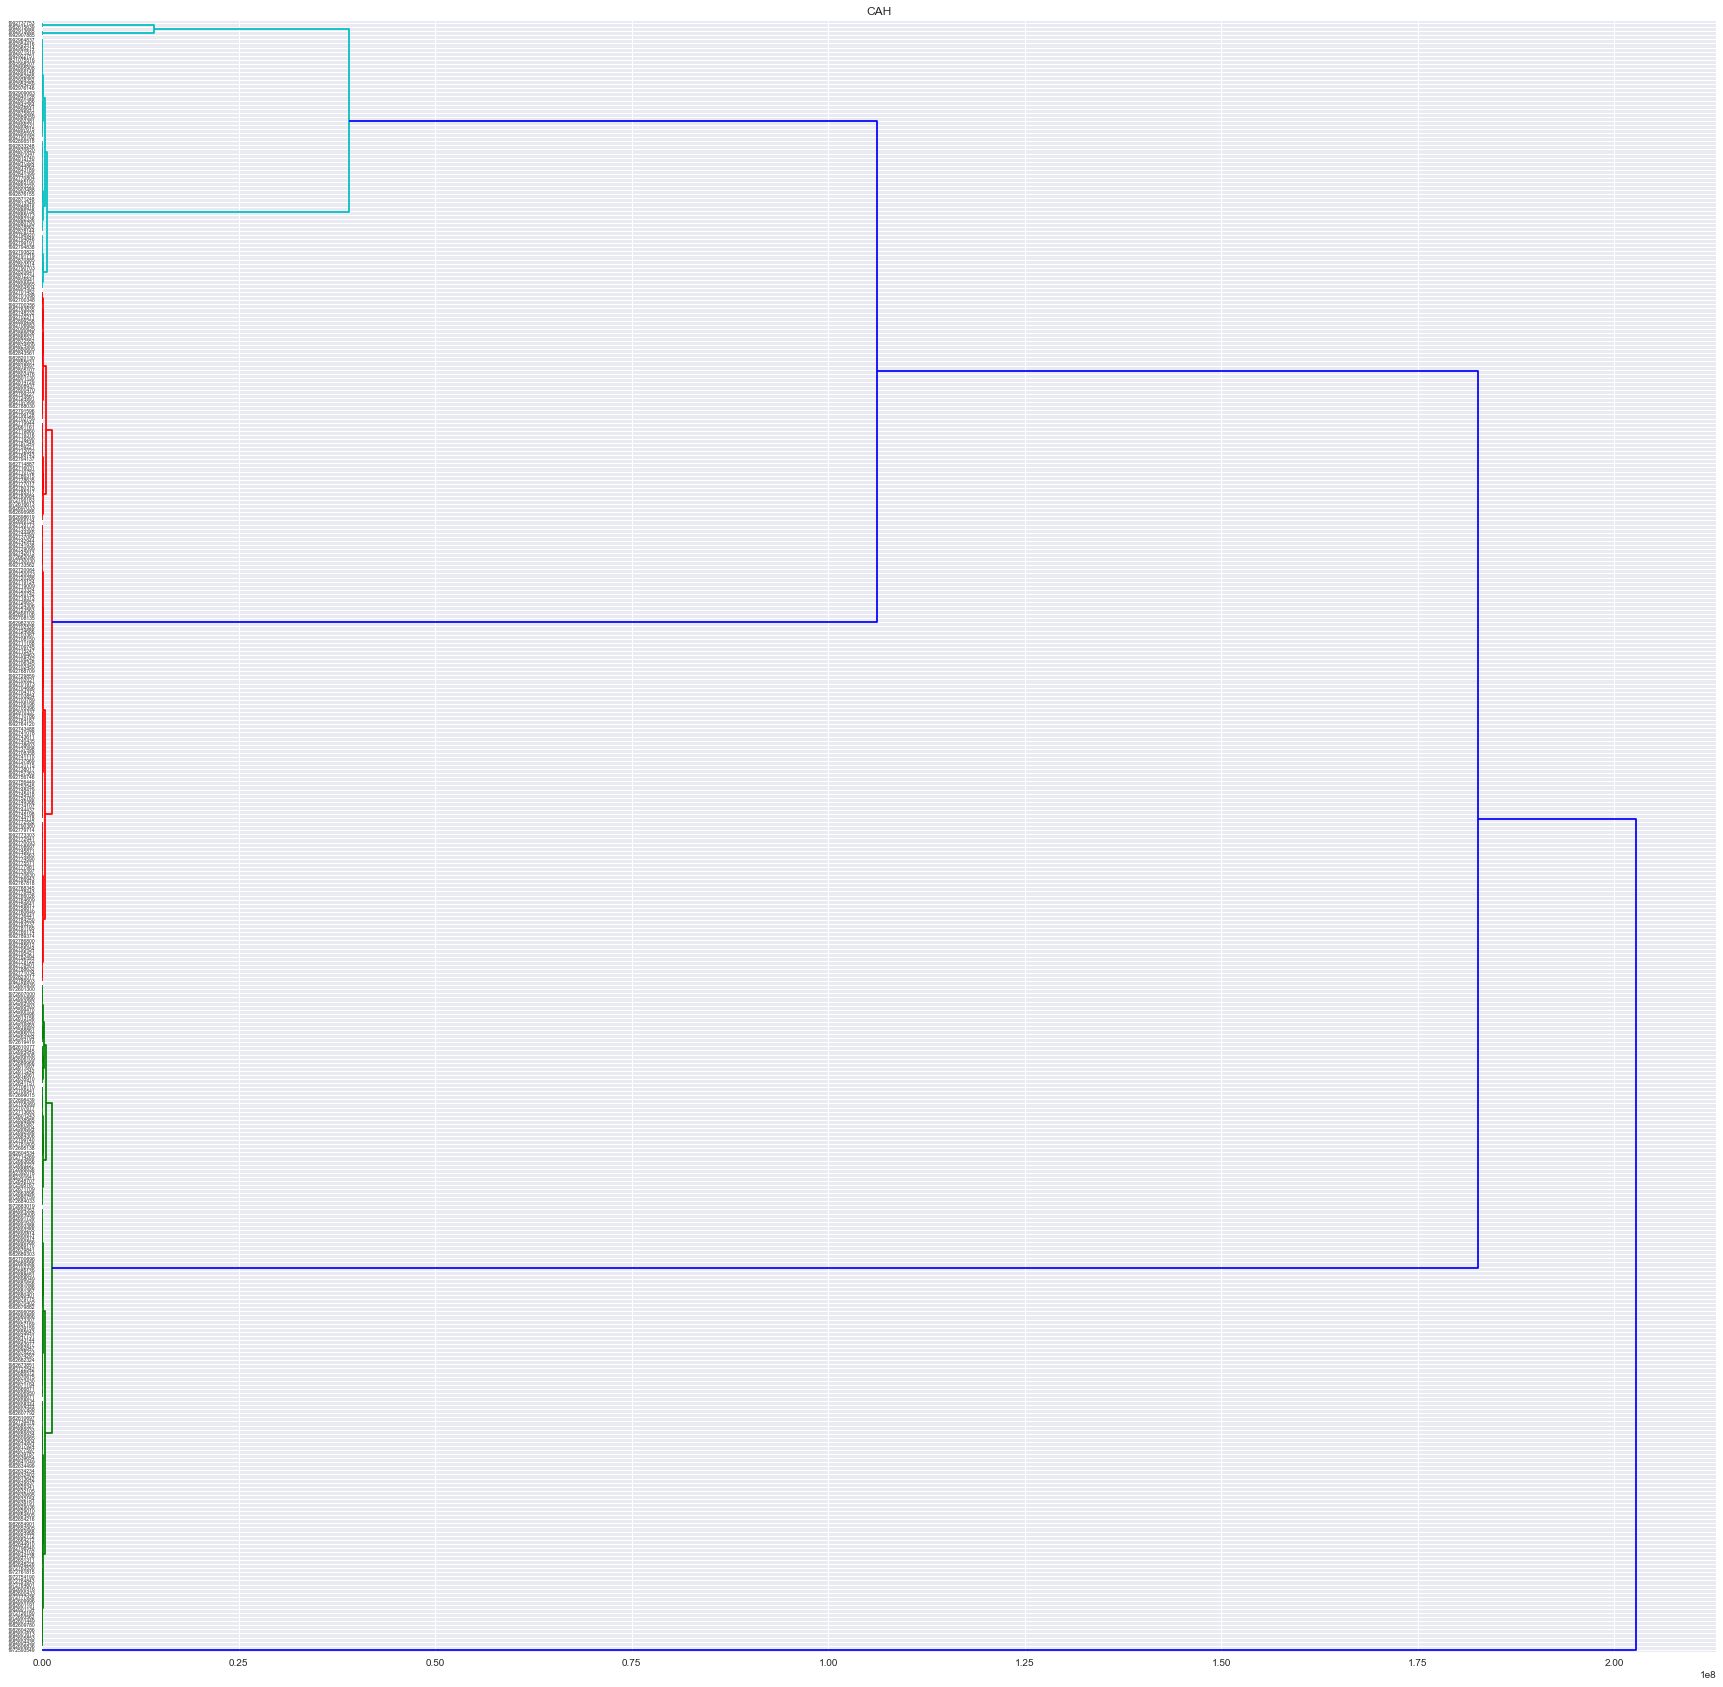

In [221]:
#affichage du dendrogramme
plt.figure(figsize=(30,30))
plt.title("CAH")
dendrogram(Z,labels=formated_data.index,orientation='right',color_threshold=100000000)
plt.show()

In [226]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


X =  np.array(for_clustreting.iloc[:,1:])

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.358340214331
For n_clusters = 3 The average silhouette_score is : 0.171689443749
For n_clusters = 4 The average silhouette_score is : 0.181216872287
For n_clusters = 5 The average silhouette_score is : 0.172490090642
For n_clusters = 6 The average silhouette_score is : 0.164089928644


## DB SCAN

In [278]:
X =  np.array(for_clustreting.iloc[:,1:])

In [277]:
from sklearn.cluster import DBSCAN

In [279]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 13


In [280]:
silhouette_score(X, labels)

0.48341004890052852